## Emerging Technologies Project 2020 
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests.

The author is Muhammad Noman Junaid (G00351754@gmit.ie).

***

In [1]:
# Import libraries.
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Set data type to float64.
keras.backend.set_floatx('float64')

## Load & Visualize Dataset
For better understanding of data with which we are dealing, we must load and visualize it. It provides us with some insights about the data and helps us in fitting a better Neural Network. We use Pandas to read the dataset and Matplotlib to plot it.

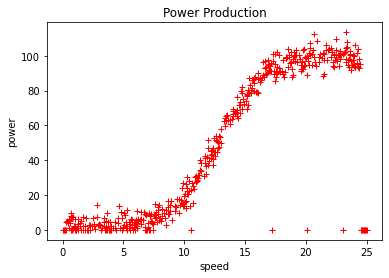

In [2]:
# Read data from data.csv into pandas dataframe.
df = pd.read_csv('data.csv')
X, y = df['speed'], df['power']

# Plot data to visualize it.
plt.plot(X, y, 'r+')
plt.title('Power Production')
plt.xlabel('speed')
plt.ylabel('power')
plt.show()

## Shuffle, Split & Transform Dataset Into Train & Test
We need to provide training and testing datasets to keras Neural Network, for that we split out dataset into two distributions one for training (80%) and one for testing (20%). To avoid overfitting or learning a pattern, we shuffle the datasets and normalize it.

In [3]:
# Split data into train, test and validation distributions.
df = shuffle(df)
X_train, y_train = df['speed'][:400], df['power'][:400]
X_test, y_test = df['speed'][400:], df['power'][400:]

## Create & Fit Model
After splitting out data into training and testing sets, we can now develop and train a neural network. We will use a sequential model with three dense layers. The first layer contains 128 neurons and RELU as activation function, second layer contains 256 neurons and RELU as activation function, output layer contains only one neuron. This model also uses dropouts to avoid overfitting.

In [4]:
# Fit a model to data.
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=50)

model.summary()

Epoch 1/50
13/13 [==============================] - 2s 86ms/step - loss: 3571.8620 - val_loss: 2643.5565
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 2618.8179 - val_loss: 1411.7664
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 1204.2413 - val_loss: 617.9042
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 615.9367 - val_loss: 611.7897
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 665.7895 - val_loss: 568.1979
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 624.5431 - val_loss: 569.2091
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 501.1957 - val_loss: 564.1081
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 650.3976 - val_loss: 562.6190
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 556.7859 - val_loss: 560.9519
Epoch 10/50
13/13 [==============================] - 0s 5ms/step - loss: 481

## Visualizing Losses
Training and validation loss is very important for any Neural Network. In fact, it is one clue during training that tells us if our model is fitting as expected or not. Keras model has a history attribute which provides a plot for losses.

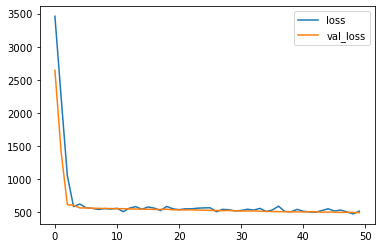

In [5]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Calculating Errors
We calculate mean squared error and mean absolute errors to check the accuracy of our model. In real world we can only minimize errors and cannot reduce them to zero.

In [6]:
# Calculate mean squared error and mean absolute error.
predictions = model.predict(X_test)

print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))

15.361894815512334
22.30348877169486


## Save Model
To use this model in a Flask server, we have to save it in .h5 format so that we can load and use it afterwards.

In [8]:
# Save model to use in flask server.
model.save('model.h5')